In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

https://scikit-learn.org/stable/
Use x and y -> x is usually inputs, y is the target
want to make function such that f(x)=y
for iris dataset, the x data is the image and y target is the type of flower that is output
feature names are the column names, targte names are the 3 types of iris flowers

In [6]:
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names


Split the data into train and test subsets. Want to have more training data for higher accuracy of the model.
There is a tradeoff with how large the test size is, however. higher accuracy does not guarantee a good model.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


Use k-nearest neighbors classification supervised learning algorithm
see more models here: https://scikit-learn.org/stable/modules/neighbors.html

for more info on knn, see:
http://vision.stanford.edu/teaching/cs231n-demos/knn/
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

The classifier value does not need to match the flowers, instead asks "how many data points around me do I need to observe to decide which type of flower I am?"
Can optimize k based on the error calculation for train and test set (error vs k-value). test/validation error will typically result in an 'elbow curve'
At low k, the model overfits the training data, while at high k the model performs poorly on both data sets

Fit the training data, and then compare the prediction against actual test variable using metrics

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Run separate check to see influence of k choice

RMSE for k =  1 is: 0.22360679774997896
RMSE for k =  2 is: 0.19364916731037085
RMSE for k =  3 is: 0.18257418583505536
RMSE for k =  4 is: 0.18819316317727025
RMSE for k =  5 is: 0.1983263304085802
RMSE for k =  6 is: 0.19364916731037085
RMSE for k =  7 is: 0.19777675864090652
RMSE for k =  8 is: 0.18610592861772746
RMSE for k =  9 is: 0.18812481628444883
RMSE for k =  10 is: 0.20207259421636906
RMSE for k =  11 is: 0.20260017758117305
RMSE for k =  12 is: 0.2110928354662592
RMSE for k =  13 is: 0.21597903324348167
RMSE for k =  14 is: 0.2207362448623206
RMSE for k =  15 is: 0.2281974453714898
RMSE for k =  16 is: 0.23537979062216308
RMSE for k =  17 is: 0.23966527985251015
RMSE for k =  18 is: 0.24647723790765014
RMSE for k =  19 is: 0.24733109087494182
RMSE for k =  20 is: 0.2411776661854631


<AxesSubplot: >

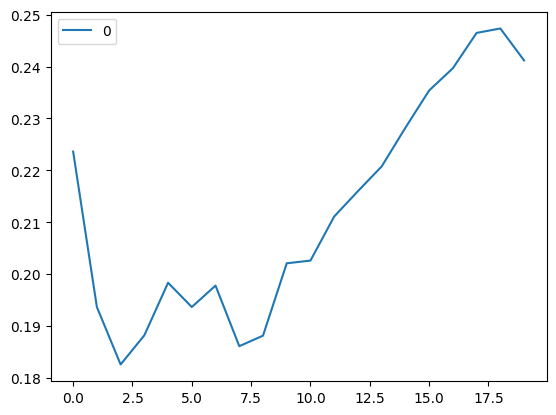

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import matplotlib.pyplot as pyplot
import pandas as pd
%matplotlib inline

rmse_val = []
for k in range(20):
    k = k+1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error = sqrt(metrics.mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE for k = ' , k , 'is:', error)

curve = pd.DataFrame(rmse_val)
curve.plot()

Final check is to use gridsearch to determine optimal k

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

# knn = KNeighborsRegressor()
knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 5}

Repeat test and train but with Decision tree to check another model
This will follow typical process with model improvement and checking

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

print(X_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier
knn = DecisionTreeClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

(75, 4)
(75, 4)
0.96


Now, say a user adds a new photo and we want to predict what it is

In [31]:
sample = [[3,5,4,2],[2,3,5,4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions: ", pred_species)

predictions:  ['versicolor', 'virginica']


In real life, will have millions of rows which takes time to fit
Utilize joblib for objects that carry large numpy arrays internally
see: https://scikit-learn.org/stable/model_persistence.html

this saves the model dumped to a file so that others can use it for new data

In [36]:
from joblib import dump, load
dump(knn, 'mlbrain.joblib')
model = load('mlbrain.joblib')
model.predict(X_test)
sample = [[3,5,4,2],[2,3,5,4]]
predictions = model.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions: ", pred_species)

predictions:  ['versicolor', 'virginica']
